In [1]:
import pandas as pd

# Load the Excel file with all sheets
df_dict = pd.read_excel("BI_Analyst_Case_Study_Data.xlsx", sheet_name=None)

# Display sheet names
print(df_dict.keys())

dict_keys(['Disbursements', 'Repayments'])


In [2]:
Disbursements_df = df_dict["Disbursements"]  
Repayments_df = df_dict["Repayments"]


In [3]:
# Read data in the 2 sheets
Disbursements_df.head()

,customer_id,disb_date,tenure,account_num,loan_amount,loan_fee,Unnamed: 6,rate,Unnamed: 8,Unnamed: 9
0,91810ca1aa097db79f050f38e9946fa5482b4e28c925e2...,2024-03-19,14 days,3O66YENWELA6E2H1R9YLX0LDZNOMNHD4,360,43.2,NaN,12.0,NaN,NaN
1,42ca06e6fe1ff9803e82a5c20184671b54090e488f78d6...,2024-03-19,7 days,6XWHXKKR1W2HIA8I0V75PZFZBXUUGSVO,70,7.0,NaN,10.0,NaN,403.2
2,b23747f53af805e18ad16a4ef235b6642d88f9134644ff...,2024-03-19,7 days,OCGK3RJZ91A999VXD4VB3LATPSME3J5L,3500,350.0,NaN,10.0,NaN,NaN
3,1bd32f9b083fc6ddfffd65730fbfa66654fa76a19b0b0e...,2024-03-19,14 days,9X3Q682DOR7927IMMJLFHBGP0RP7YF5C,3500,420.0,NaN,12.0,NaN,NaN
4,e7cfbaa97ba7702c52df5f1dddba54bd26923ebad945f1...,2024-03-19,7 days,AQH88NNF8S76MGJL4J4ULEAE18O0KLWH,120,12.0,NaN,10.0,NaN,NaN


In [4]:
Repayments_df.head()

,date_time,customer_id,amount,rep_month,repayment_type
0,27-JUN-24 07.16.36.000000000 AM,683131338d401fda38410a808797b7706bc3e364d0fe77...,500.65,202406,Automatic
1,27-JUN-24 05.26.50.000000000 PM,56a41251185bd205961556399289804607ccc660392837...,2833.33,202406,Automatic
2,27-JUN-24 06.45.40.000000000 PM,000e57e83f161e4ba6458b3e32c00815405c5a005e652b...,143.98,202406,Automatic
3,27-JUN-24 01.24.57.000000000 PM,f3606d5ac9a89e0251a60d7183a09bc742eba2e36882af...,1000.00,202406,Automatic
4,27-JUN-24 01.31.44.000000000 PM,f3606d5ac9a89e0251a60d7183a09bc742eba2e36882af...,801.00,202406,Manual


In [5]:
Disbursements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26585 entries, 0 to 26584
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  26585 non-null  object        
 1   disb_date    26585 non-null  datetime64[ns]
 2   tenure       26585 non-null  object        
 3   account_num  26585 non-null  object        
 4   loan_amount  26585 non-null  int64         
 5   loan_fee     26585 non-null  float64       
 6   Unnamed: 6   0 non-null      float64       
 7   rate         121 non-null    float64       
 8   Unnamed: 8   3 non-null      object        
 9   Unnamed: 9   1 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 2.0+ MB


In [6]:
Repayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66016 entries, 0 to 66015
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_time       66016 non-null  object 
 1   customer_id     66016 non-null  object 
 2   amount          66016 non-null  float64
 3   rep_month       66016 non-null  int64  
 4   repayment_type  66016 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [7]:
# Check for null values

In [8]:
print(Disbursements_df.isnull().sum())  

customer_id        0
disb_date          0
tenure             0
account_num        0
loan_amount        0
loan_fee           0
Unnamed: 6     26585
rate           26464
Unnamed: 8     26582
Unnamed: 9     26584
dtype: int64


In [9]:
print(Repayments_df.isnull().sum()) 

date_time         0
customer_id       0
amount            0
rep_month         0
repayment_type    0
dtype: int64


In [10]:
# Check for duplicates

In [11]:
print(Disbursements_df.duplicated().sum()) 
print(Repayments_df.duplicated().sum())

43
111


In [12]:
Disbursements_df.drop_duplicates(inplace = True)
Repayments_df.drop_duplicates(inplace = True)


In [13]:
# Summary statistics for Disbursements
Disbursements_df.describe()


,loan_amount,loan_fee,Unnamed: 6,rate,Unnamed: 9
count,26542.000000,26542.000000,0.0,121.000000,1.0
mean,1001.790897,129.801400,NaN,12.041322,403.2
std,1171.862901,160.919748,NaN,1.743544,NaN
min,70.000000,7.000000,NaN,10.000000,403.2
25%,150.000000,16.800000,NaN,10.000000,403.2
50%,420.000000,50.000000,NaN,12.000000,403.2
75%,1460.000000,182.400000,NaN,12.000000,403.2
max,3500.000000,525.000000,NaN,15.000000,403.2


In [14]:
# Exclude rep_month from Repayments summary
Repayments_df.drop(columns=['rep_month']).describe()

,amount
count,65905.000000
mean,462.488082
std,838.584103
min,0.010000
25%,22.580000
50%,110.780000
75%,450.000000
max,4025.000000


In [15]:
Disbursements_df['disb_month'] = pd.to_datetime(Disbursements_df['disb_date']).dt.to_period('M')  # Extract month
Repayments_df['rep_month'] = pd.to_datetime(Repayments_df['rep_month']).dt.to_period('M')  # Convert to period

# Aggregate total loan disbursed and repaid per month
disb_monthly = Disbursements_df.groupby('disb_month')['loan_amount'].sum().reset_index()
rep_monthly = Repayments_df.groupby('rep_month')['amount'].sum().reset_index()

# Rename columns 
disb_monthly.columns = ['month', 'total_disbursed']
rep_monthly.columns = ['month', 'total_repaid']

# Merge both datasets
profit_loss = pd.merge(disb_monthly, rep_monthly, on='month', how='outer').fillna(0)

# Calculate net profit/loss
profit_loss['net_profit_loss'] = profit_loss['total_repaid'] - profit_loss['total_disbursed']


In [16]:
profit_loss

,month,total_disbursed,total_repaid,net_profit_loss
0,2024-01,3177425.0,0.00,-3177425.00
1,2024-02,3428115.0,0.00,-3428115.00
2,2024-03,3932061.0,0.00,-3932061.00
3,2024-04,3933810.0,0.00,-3933810.00
4,2024-05,4014139.0,0.00,-4014139.00
5,2024-06,3505498.0,0.00,-3505498.00
6,2024-07,3393428.0,0.00,-3393428.00
7,2024-08,1205058.0,0.00,-1205058.00
8,1970-01,0.0,30480277.03,30480277.03


In [17]:
#extracting month from df1 disb_date
Disbursements_df.loc[:, 'month'] = pd.to_datetime(Disbursements_df['disb_date']).dt.strftime('%Y-%m')


In [18]:
#asssuming loan fee is an extra income, and not part of repayment
Disbursements_df['net_profit_loss'] = Repayments_df.groupby('customer_id')['amount'].transform('sum') + Disbursements_df['loan_fee'] - Disbursements_df['loan_amount']


In [19]:
Disbursements_df = Disbursements_df.merge(Repayments_df.groupby('customer_id')['amount'].sum().reset_index(), on='customer_id', how='left')
Disbursements_df['loan_amount'] = Disbursements_df['loan_amount'].fillna(0)  # Fill missing repayments with 0
Disbursements_df.loc[:, 'net_profit_loss'] = Disbursements_df['loan_fee'] + Disbursements_df['loan_amount'] - Disbursements_df['loan_amount']


In [20]:
Disbursements_df[['customer_id', 'month', 'loan_fee', 'amount', 'loan_amount', 'net_profit_loss']].head()

,customer_id,month,loan_fee,amount,loan_amount,net_profit_loss
0,91810ca1aa097db79f050f38e9946fa5482b4e28c925e2...,2024-03,43.2,5753.4,360,43.2
1,42ca06e6fe1ff9803e82a5c20184671b54090e488f78d6...,2024-03,7.0,1173.0,70,7.0
2,b23747f53af805e18ad16a4ef235b6642d88f9134644ff...,2024-03,350.0,92389.8,3500,350.0
3,1bd32f9b083fc6ddfffd65730fbfa66654fa76a19b0b0e...,2024-03,420.0,28262.5,3500,420.0
4,e7cfbaa97ba7702c52df5f1dddba54bd26923ebad945f1...,2024-03,12.0,3158.4,120,12.0


In [21]:
# Total net profir/loss per month
df_time_series = Disbursements_df.groupby('month')['net_profit_loss'].sum().reset_index()


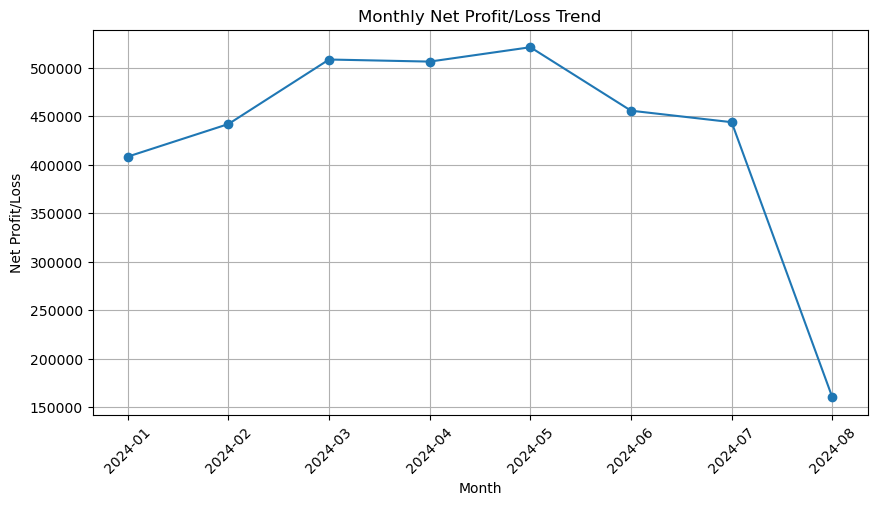

In [22]:
#line graph to visualize trends
import matplotlib.pyplot as plt  

plt.figure(figsize=(10,5))
plt.plot(df_time_series['month'], df_time_series['net_profit_loss'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Net Profit/Loss')
plt.title('Monthly Net Profit/Loss Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


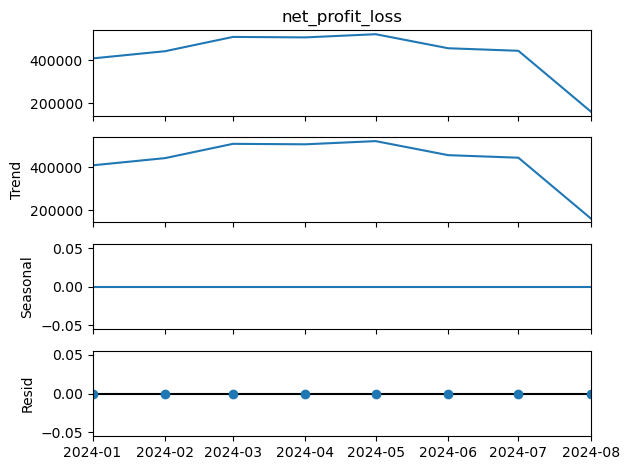

In [23]:
#Time Series Decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose  

df_time_series['month'] = pd.to_datetime(df_time_series['month'])  
df_time_series.set_index('month', inplace=True)  

decomposition = seasonal_decompose(df_time_series['net_profit_loss'], model='additive', period=1)  
decomposition.plot()  
plt.show()


In [24]:
# checking for 
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df_time_series['net_profit_loss'])

# Print results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Interpret results
if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is NOT stationary. Differencing is needed.")


ADF Statistic: 0.3471420920742502
p-value: 0.9794069161353718
Critical Values: {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}
The data is NOT stationary. Differencing is needed.


In [25]:
#Apply Differencing since p-value = 0.98, since data is not stationary
df_time_series['net_profit_loss_diff'] = df_time_series['net_profit_loss'].diff()

# Drop the first NaN value after differencing
df_time_series = df_time_series.dropna()

# Perform ADF test 
result = adfuller(df_time_series['net_profit_loss_diff'])

# Print results
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("The data is now stationary.")
else:
    print("The data is still NOT stationary. Further differencing may be needed.")


ADF Statistic: 1.5940255878379057
p-value: 0.9978395408578127
The data is still NOT stationary. Further differencing may be needed.


In [26]:
df_time_series['net_profit_loss_diff2'] = df_time_series['net_profit_loss'].diff().diff()


In [27]:
#Check whether data is stationary
result = adfuller(df_time_series['net_profit_loss_diff2'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is NOT stationary. Further differencing may be needed.")


ADF Statistic: -5.929190139745033
p-value: 2.40311739697012e-07
The data is stationary.


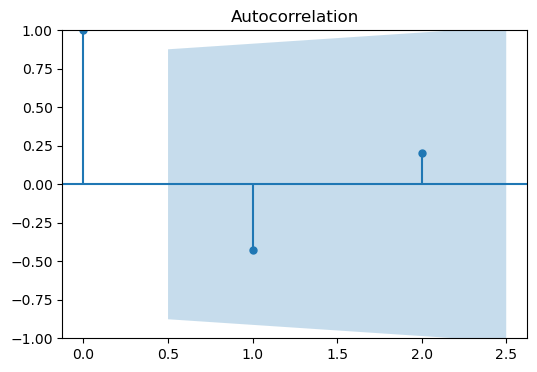

In [28]:
# (Use ACF since the dataset is small
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
plot_acf(df_time_series['net_profit_loss_diff2'].dropna(), ax=ax, lags=2)  # Reduce lags
plt.show()


In [29]:
df_time_series.index = pd.to_datetime(df_time_series.index)
df_time_series = df_time_series.asfreq('MS')  # 'MS' = Monthly Start


In [30]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_time_series['net_profit_loss'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 0.5105599181561364
p-value: 0.9851905469826984


In [31]:
df_time_series['net_profit_loss'] = df_time_series['net_profit_loss'] / 1e6  


In [32]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_time_series['net_profit_loss'], order=(1,2,1))
model_fit = model.fit()

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        net_profit_loss   No. Observations:                    7
Model:                 ARIMA(1, 2, 1)   Log Likelihood                   3.695
Date:                Fri, 21 Mar 2025   AIC                             -1.390
Time:                        12:12:43   BIC                             -2.562
Sample:                    02-01-2024   HQIC                            -4.535
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8868      3.248     -0.273      0.785      -7.253       5.480
ma.L1          0.5055      8.255      0.061      0.951     -15.674      16.685
sigma2         0.0117      0.015      0.804      0.421      -0.017       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                 1.20
Prob(Q):                              0.40   Prob(JB):                         0.55
Heteroskedasticity (H):              15.89   Skew:                            -1.20
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
 # 3-month forecast
forecast = model_fit.forecast(steps=3) 
print(forecast)


2024-09-01    0.001849
2024-10-01   -0.267633
2024-11-01   -0.438441
Freq: MS, Name: predicted_mean, dtype: float64
